In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

In [5]:
#Read excel files for training and testing 
df_train=pd.read_excel("/Users/HP/Desktop/PROJECT/height/height_train.xlsx")
df_test=pd.read_excel("/Users/HP/Desktop/PROJECT/height/height_test.xlsx")
                 

In [9]:
df_train.columns

Index(['Index', 'Height(cm)', 'Weight(kg)'], dtype='object')

In [10]:
df_test.columns

Index(['Index', 'Height(cm)'], dtype='object')

In [11]:
df_train.dtypes

Index           int64
Height(cm)    float64
Weight(kg)    float64
dtype: object

In [12]:
df_test.dtypes

Index           int64
Height(cm)    float64
dtype: object

In [14]:
df_train.shape, df_test.shape

((25005, 3), (1008, 2))

In [15]:
df_train.head()

,Index,Height(cm),Weight(kg)
0,1,167.089607,51.298595
1,2,181.648633,61.965234
2,3,176.272800,69.474213
3,4,173.270164,64.620272
4,5,172.181037,65.510883


In [16]:
df_test.head()

,Index,Height(cm)
0,23998,167.000000
1,23999,168.000000
2,24000,170.006594
3,24001,180.485339
4,24002,178.931595


In [17]:
df_train.isnull().sum()

Index         0
Height(cm)    0
Weight(kg)    0
dtype: int64

In [18]:
df_test.isnull().sum()

Index         0
Height(cm)    0
dtype: int64

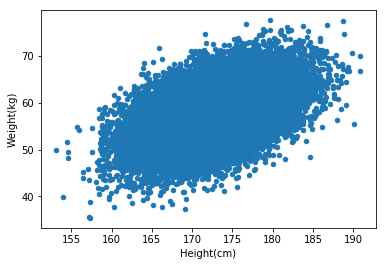

In [19]:
df_train.plot.scatter('Height(cm)','Weight(kg)')

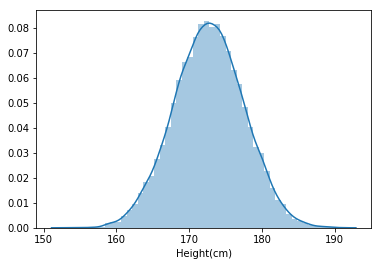

In [20]:
sns.distplot(df_train["Height(cm)"])

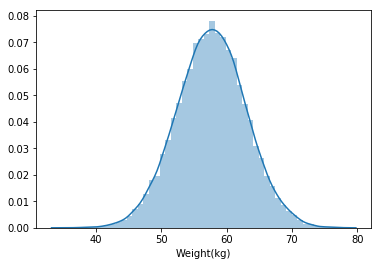

In [21]:
sns.distplot(df_train["Weight(kg)"])

In [107]:
#making the train dataset 

train=df_train[0:20000]

#making the test dataset

test=df_train[20001:]

In [108]:
x_train=train.drop('Weight(kg)',axis=1)

y_train=train['Weight(kg)']

In [109]:
x_test=test.drop('Weight(kg)',axis=1)

y_test=test['Weight(kg)']

In [110]:
y_train.shape

(20000,)

In [111]:
#import linear regression

from sklearn.linear_model import LinearRegression

In [112]:
#_object_creation of linearRegression 

lreg=LinearRegression()

In [113]:
#MODEL building

lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [114]:
# making prediction on the validation set
prediction = lreg.predict(x_test)
print(prediction)

[59.15691521 63.37791165 61.66526891 ... 52.96037346 56.90746308
 58.78773657]


In [115]:
#performance of our model -r2

lreg.score(x_test,y_test)

0.258947820386512

In [116]:
lreg.score(x_train,y_train)

0.2514689069906959

In [117]:
#predicting the test data

pred=lreg.predict(df_test)

In [119]:
#submit in file

submission = pd.DataFrame()

In [120]:
submission['Index'] = df1['Index']
submission['Height(cm)'] = df1['Height(cm)']
submission['Weight(kg)']=pred

In [123]:
submission.to_csv('submission.csv', header=True, index=False)